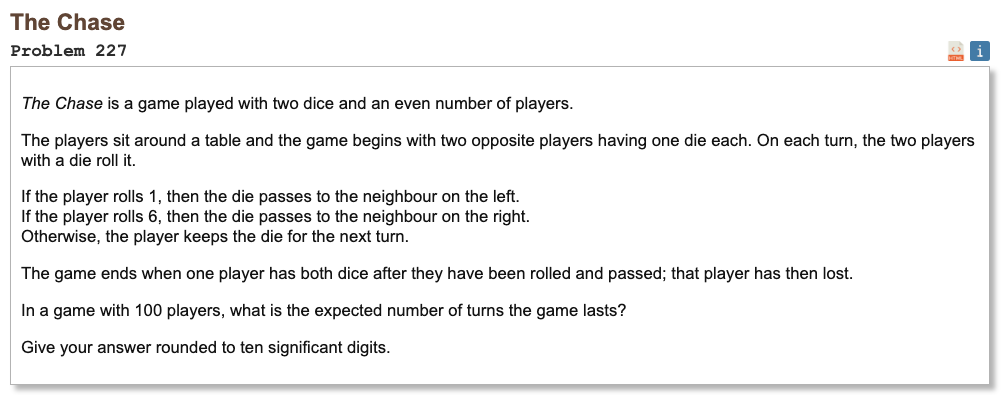

## Initial approach

* model each die as a random walk on a circle of 100 players
* in one turn a die moves left with probability 1/6, right with probability 1/6, otherwise it stays
* the game ends the first time both dice land on the same player after a turn, so we just need the expected hitting time to a meeting
* track only the relative offset d between the two dice positions modulo 100, because absolute positions do not matter
* each turn changes d by a small delta in {-2,-1,0,1,2} coming from the difference of the two dice moves
* write equations E[d] = 1 + sum(p(delta) * E[(d+delta) mod 100]) with E[0] = 0
* solve these linear equations numerically by Gauss Seidel updates until the values stop changing
* read off E[50] because the dice start opposite each other in a 100 player circle

In [1]:
import math

def expected_turns(n_players=100, tol=1e-14, max_iter=300000):
    n = n_players
    probs = {
        -2: 1.0 / 36.0,
        -1: 8.0 / 36.0,
        0: 18.0 / 36.0,
        1: 8.0 / 36.0,
        2: 1.0 / 36.0,
    }

    e = [0.0] * n

    for _ in range(max_iter):
        max_diff = 0.0
        for d in range(1, n):
            s = 0.0
            for delta, p in probs.items():
                s += p * e[(d + delta) % n]
            new_val = 1.0 + s
            diff = abs(new_val - e[d])
            if diff > max_diff:
                max_diff = diff
            e[d] = new_val
        if max_diff < tol:
            break

    return e[n // 2]

In [2]:
%%time
result = expected_turns(100)
print("Result:", float(f"{result:.10g}"))

Result: 3780.618622
CPU times: user 1.92 s, sys: 6.4 ms, total: 1.92 s
Wall time: 1.92 s
